# MNIST FASHION TRAINED BY KERAS

In this model mnist fashion dataset with 10 classes and 70000 samples trained by Keras.  

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import tensorflow as tf

from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [154]:
#check for a GPU
if tf.test.gpu_device_name():
    print('Default GPU device is {}: '.format(tf.test.gpu_device_name()))
else:
    print("No GPU found. Please use GPU for train the model.")

No GPU found. Please use GPU for train the model.


## Step: ETL - Extract Transform Load

In [155]:
#get data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [156]:
print("Train Shape: {},\tLabel Shape:{} ".format(x_train.shape, y_train.shape))
print("Test Shape: {},\tLabel Shape:{} ".format(x_test.shape, y_test.shape))

Train Shape: (60000, 28, 28),	Label Shape:(60000,) 
Test Shape: (10000, 28, 28),	Label Shape:(10000,) 


In [157]:
# show a random sample from each class of the Fashion Mnist Set
def show_images(images, rows, cols):
    fig, ax1 = plt.subplots(rows, cols, figsize=(12, 8))
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    plt.suptitle('EACH CLASS RANDOM IMAGE')
    for idx, ax in enumerate(ax1.ravel()):
        if idx < len(labels):
            # show a random image of the current class
            cur_X = images[y_train == idx]
            cur_img = cur_X[np.random.randint(len(cur_X))]
            cur_img1=np.reshape(cur_img, (cur_img.shape[0],cur_img.shape[1] ))
            ax.imshow(cur_img1, cmap='gray')
            ax.set_title('{:02d}: {}'.format(idx, labels[idx]))
        else:
            ax.axis('off')
    # hide both x and y ticks
    plt.setp([a.get_xticklabels() for a in ax1.ravel()], visible=False)
    plt.setp([a.get_yticklabels() for a in ax1.ravel()], visible=False)
    plt.draw()

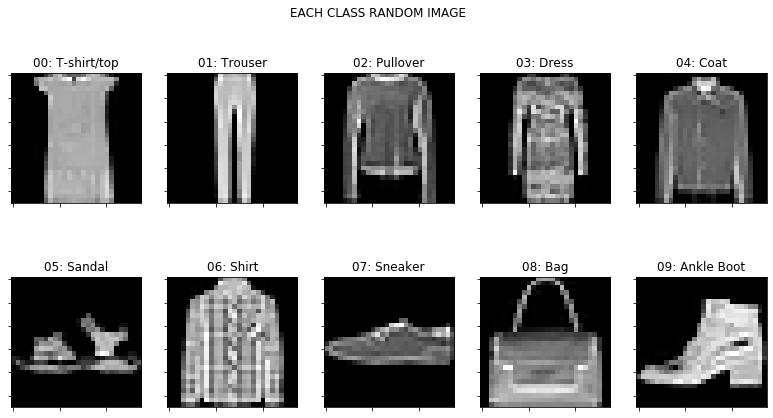

In [158]:
# Labes
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

show_images(x_train, 2, 5)

# Paramaters to need

In [159]:
#parameters
n_classes = 10
rows, cols, channels = 28, 28, 1
pool_size = 3 #using it for max_pooling
filter_size = 3 #using it for conv2d


# hyperparameters
epochs = 20
dropout = 0.25
batch_size = 32
# decay = np.exp(1e-4)

#model input
model_input = (rows, cols, channels)

## STEP: Data Preprocessing (Data Cleansing - Feature Engineering)

In [160]:
# Reshape images (add channel), normalize data, and one-hot encoding to labels
def preprocessing(x_, y_):  
    x_ = x_.reshape(x_.shape[0], x_.shape[1], x_.shape[2], 1)
    x_norm = x_ / 255
    y_oneHot = to_categorical(y_, len(labels))
    return x_norm, y_oneHot

In [161]:
x_train_pre, y_train_pre = preprocessing(x_train, y_train)
x_test_pre, y_test_pre = preprocessing(x_test, y_test)
print("Train Shape: {},\tLabel Shape:{} ".format(x_train_pre.shape, y_train_pre.shape))
print("Test Shape: {},\t\tLabel Shape:{} ".format(x_test_pre.shape, y_test_pre.shape))

Train Shape: (60000, 28, 28, 1),	Label Shape:(60000, 10) 
Test Shape: (10000, 28, 28, 1),		Label Shape:(10000, 10) 


In [162]:
#Split Training Data to Train-Validation Data Set
X_train, X_val, y_train, y_val = train_test_split(x_train_pre, y_train_pre, test_size=0.2, shuffle=True)
print("Train Shape: {},\tLabel Shape:{} ".format(X_train.shape, y_train.shape))
print("Valid Shape: {},\tLabel Shape:{} ".format(X_val.shape, y_val.shape))

Train Shape: (48000, 28, 28, 1),	Label Shape:(48000, 10) 
Valid Shape: (12000, 28, 28, 1),	Label Shape:(12000, 10) 


## Step: Model Definition



### Create the model architecture
There are two APIs for defining a model in Keras:

Sequential model or
Functional. Selected Sequential API.

In [163]:
K.set_image_dim_ordering('tf')
#Get model from keras Sequential()
model = Sequential()

#for normalization just make batch normalization if not preprocessing the data
# model.add(BatchNormalization())

#First block
model.add(Conv2D(64, filter_size, activation='relu', bias_initializer='RandomNormal', 
                 kernel_initializer='truncated_normal', padding = 'same', input_shape=model_input))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(dropout))

#Second block 

model.add(Conv2D(128, filter_size, activation='relu', bias_initializer='RandomNormal', 
                 kernel_initializer='truncated_normal', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))

#Third block 
model.add(BatchNormalization())
model.add(Conv2D(256, filter_size, activation='relu', bias_initializer='RandomNormal', 
                 kernel_initializer='truncated_normal', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))


#Flattenning tensor
model.add(Flatten())

#Dense layer1
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout))

#Dense layer2
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))

#last layer for output
model.add(Dense(n_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_28 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 4, 4, 128)         512       
__________

### Compile the model

In [164]:
#optimizing and compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',   #Adam(decay=decay),
              metrics=['accuracy'])


## Step: Train the Model

In [102]:
now = datetime.datetime.now
t = now()
checkpoints = ModelCheckpoint(filepath='model.bestweight.hdf5', verbose = 1, save_best_only=True)
history = model.fit(X_train,
          y_train,
          batch_size = batch_size,
          epochs= epochs,
          validation_data=(X_val, y_val),
          callbacks = [checkpoints])
print('Training time: {}'.format(now() - t))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 114s 2ms/step - loss: 0.6027 - acc: 0.7830 - val_loss: 0.3891 - val_acc: 0.8588

Epoch 00001: val_loss improved from inf to 0.38912, saving model to model.bestweight.hdf5
Epoch 2/20
48000/48000 [==============================] - 118s 2ms/step - loss: 0.3715 - acc: 0.8693 - val_loss: 0.2879 - val_acc: 0.8949

Epoch 00002: val_loss improved from 0.38912 to 0.28785, saving model to model.bestweight.hdf5
Epoch 3/20
48000/48000 [==============================] - 120s 2ms/step - loss: 0.3200 - acc: 0.8869 - val_loss: 0.2762 - val_acc: 0.8976

Epoch 00003: val_loss improved from 0.28785 to 0.27624, saving model to model.bestweight.hdf5
Epoch 4/20
48000/48000 [==============================] - 119s 2ms/step - loss: 0.2969 - acc: 0.8952 - val_loss: 0.2747 - val_acc: 0.9082

Epoch 00004: val_loss improved from 0.27624 to 0.27471, saving model to model.bestweight.hdf5
Epoch 5/20
48000/48000

## Step: Model Evaluation

In [141]:
#Load Model with Best Validation Weights
model.load_weights('model.bestweight.hdf5')

#Evaluate Model over the Test Data
score = model.evaluate(x_test_pre, y_test_pre, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29248803809881213
Test accuracy: 0.9046


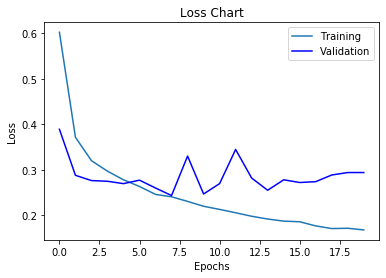

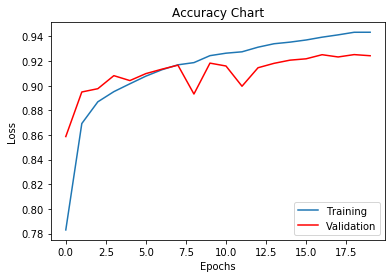

In [124]:

# show the loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Chart')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy Chart')
plt.legend(['Training', 'Validation'], loc=4)
plt.show() 
